<a href="https://colab.research.google.com/github/Gr3gP/Thinkful-Projects/blob/main/Pulsar_Star_Identification_with_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Intent

>  The purpose of this paper is to create and train a Machine Learning model to predict wthether a celestial body is a pulsar given a celestial body is a pulsar star of not. The dataset comes from __[Kaggle](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate?select=pulsar_data_test.csv)__. 

#Overview of Pulsars

>  A pulsar is a particularly rare type of neutron star in our universe that is created by dying stars with a mass between 4 and 8 solar masses(M0 ~ 2 * 10^30 kg, or 333,000x Earths mass). When these star reach the end of their life, their core collapses in on itself so intensely that it crushes protons and electrons together to form neutrons and the ensuing supernova blows off the outlayers of the star, revealing the super dense spinning core. 

>  Pulsars are usaully between 1 and 3 solar masses, pack 1 billion tons(2 trillion kg) into a single teaspoon(~ 6 grams), and spin at a mind boggling rate of tens of thousands of rotations per minute. Pulsars are also extremely magnetized and emit beams of electromagnetic radiation that can be measured in the form of x-rays, gamma-rays, and  radiowaves. Their magnetic fields are billions of times stronger than the Earths, effectiely making them rediculously high energy particle accelerators. This is where there name is derived since on Earth, we see these beams of energy 'pulse' as the star spins. They exist in this sweet spot making them quite rare. To date, we have identified a mere 2,000 of these stars in our own Milky Way Galaxy. However, it is theorized that there should be nearly a billion of these within our own Galaxy.





#The Data

>  As mentioned before, this data came from Kaggle and has 9 columns that we will describe briefly here. The data contains the following columns:


1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class


> The first four columns are measured attributes of the stars and the last four are obtained by some statistical calculations on the DM-SNR curve. The features are all contiuous as well. Dispersion-measure-signal-to-noise-ratio(DM-SNR) is a calculated measure using the image of stars. the Integrated profile, also known as the integrated intensity profile, is a standard tool in image analysis. 


#Approach

>  We will model this problem as a binary classification problem. I will use a variety of classifiers like KNN, Random Forest, Support Vector Machines, and Gradeint Boosting to see how well we can get them to perform the task and then settle on the best performing one to put forward as a possible impementation for identifying pulsar stars.


**Sources**:

https://imagine.gsfc.nasa.gov/science/objects/neutron_stars1.html

http://www.actforlibraries.org/how-a-pulsar-is-created/

https://www.space.com/22180-neutron-stars.html

https://nineplanets.org/pulsars/

Data set Citation:

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
	Candidate Selection: From simple filters to a new principled real-time classification approach
	MNRAS, 2016.


#EDA and Data Cleaning

In [ ]:
#import the dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving pulsar_data_train.csv to pulsar_data_train.csv


In [ ]:
import io
pulsar_df = pd.read_csv(io.BytesIO(uploaded['pulsar_data_train.csv']))
pulsar_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [ ]:
pulsar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [ ]:
pulsar_df.isnull().sum()/pulsar_df.count()

 Mean of the integrated profile                  0.000000
 Standard deviation of the integrated profile    0.000000
 Excess kurtosis of the integrated profile       0.160752
 Skewness of the integrated profile              0.000000
 Mean of the DM-SNR curve                        0.000000
 Standard deviation of the DM-SNR curve          0.103789
 Excess kurtosis of the DM-SNR curve             0.000000
 Skewness of the DM-SNR curve                    0.052508
target_class                                     0.000000
dtype: float64

In [ ]:
pulsar_df[' Standard deviation of the DM-SNR curve'].fillna(pulsar_df[' Standard deviation of the DM-SNR curve'].mean(), inplace=True)
pulsar_df[' Excess kurtosis of the integrated profile'].fillna(pulsar_df[' Excess kurtosis of the integrated profile'].mean(), inplace=True)
pulsar_df[' Skewness of the DM-SNR curve'].fillna(pulsar_df[' Skewness of the DM-SNR curve'].mean(), inplace=True)

In [ ]:
pulsar_df.isnull().any()

 Mean of the integrated profile                  False
 Standard deviation of the integrated profile    False
 Excess kurtosis of the integrated profile       False
 Skewness of the integrated profile              False
 Mean of the DM-SNR curve                        False
 Standard deviation of the DM-SNR curve          False
 Excess kurtosis of the DM-SNR curve             False
 Skewness of the DM-SNR curve                    False
target_class                                     False
dtype: bool

In [ ]:
pulsar_df.isnull().sum()/pulsar_df.count()

 Mean of the integrated profile                  0.0
 Standard deviation of the integrated profile    0.0
 Excess kurtosis of the integrated profile       0.0
 Skewness of the integrated profile              0.0
 Mean of the DM-SNR curve                        0.0
 Standard deviation of the DM-SNR curve          0.0
 Excess kurtosis of the DM-SNR curve             0.0
 Skewness of the DM-SNR curve                    0.0
target_class                                     0.0
dtype: float64

In [ ]:
pulsar_df.count()

 Mean of the integrated profile                  12528
 Standard deviation of the integrated profile    12528
 Excess kurtosis of the integrated profile       12528
 Skewness of the integrated profile              12528
 Mean of the DM-SNR curve                        12528
 Standard deviation of the DM-SNR curve          12528
 Excess kurtosis of the DM-SNR curve             12528
 Skewness of the DM-SNR curve                    12528
target_class                                     12528
dtype: int64

In [ ]:
for col in pulsar_df:
  print(pulsar_df[col].unique)

<bound method Series.unique of 0        121.156250
1         76.968750
2        130.585938
3        156.398438
4         84.804688
            ...    
12523    124.312500
12524    115.617188
12525    116.031250
12526    135.664062
12527    120.726562
Name:  Mean of the integrated profile, Length: 12528, dtype: float64>
<bound method Series.unique of 0        48.372971
1        36.175557
2        53.229534
3        48.865942
4        36.117659
           ...    
12523    53.179053
12524    46.784600
12525    43.213846
12526    49.933749
12527    50.472256
Name:  Standard deviation of the integrated profile, Length: 12528, dtype: float64>
<bound method Series.unique of 0        0.375485
1        0.712898
2        0.133408
3       -0.215989
4        0.825013
           ...   
12523   -0.012418
12524    0.218177
12525    0.663456
12526   -0.089940
12527    0.346178
Name:  Excess kurtosis of the integrated profile, Length: 12528, dtype: float64>
<bound method Series.unique of 0       -0.013

In [ ]:
pulsar_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666010,4.535783,104.686104,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [ ]:
pulsar_df['target_class'].nunique()

2

In [ ]:
pulsar_df.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.551105,-0.808431,-0.737598,-0.298123,-0.300864,0.235781,0.142737,-0.676129
Standard deviation of the integrated profile,0.551105,1.000000,-0.487920,-0.539896,-0.001656,-0.055638,0.031671,0.028008,-0.365757
Excess kurtosis of the integrated profile,-0.808431,-0.487920,1.000000,0.877284,0.385326,0.392646,-0.318348,-0.195143,0.735358
Skewness of the integrated profile,-0.737598,-0.539896,0.877284,1.000000,0.412659,0.408672,-0.328675,-0.197847,0.707086
Mean of the DM-SNR curve,-0.298123,-0.001656,0.385326,0.412659,1.000000,0.764647,-0.616385,-0.345690,0.400375
Standard deviation of the DM-SNR curve,-0.300864,-0.055638,0.392646,0.408672,0.764647,1.000000,-0.770396,-0.530973,0.473951
Excess kurtosis of the DM-SNR curve,0.235781,0.031671,-0.318348,-0.328675,-0.616385,-0.770396,1.000000,0.900209,-0.389788
Skewness of the DM-SNR curve,0.142737,0.028008,-0.195143,-0.197847,-0.345690,-0.530973,0.900209,1.000000,-0.252056
target_class,-0.676129,-0.365757,0.735358,0.707086,0.400375,0.473951,-0.389788,-0.252056,1.000000


After exploring the data, we can see our data is in the correct data type and our class variable is already encoded. We can also see that the two most strongly correlated variables with our target are Excess kurtosis of the integrated profile and Skewness of the integrated profile. This is something to keep in mind when modeling.

#Visualizations: Histograms, Boxplots, and Scatterplots

In [ ]:
import matplotlib.pyplot as plt

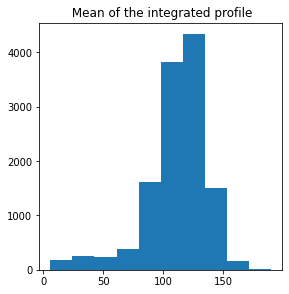

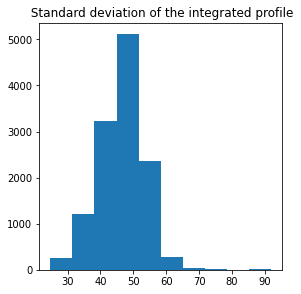

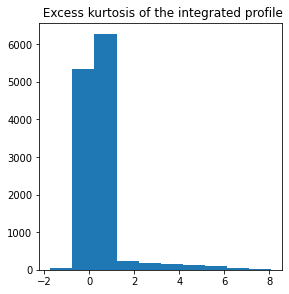

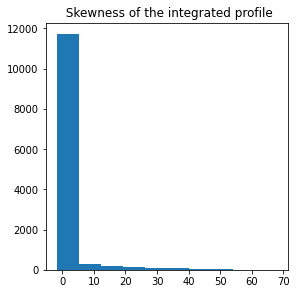

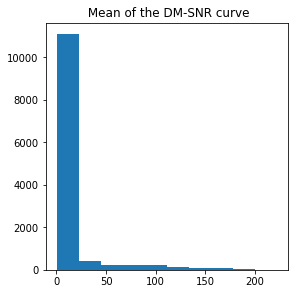

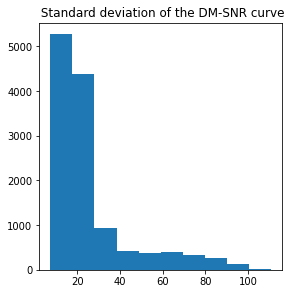

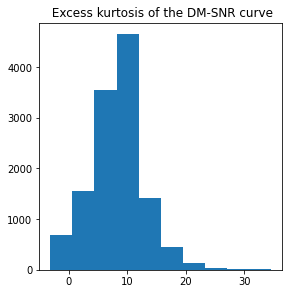

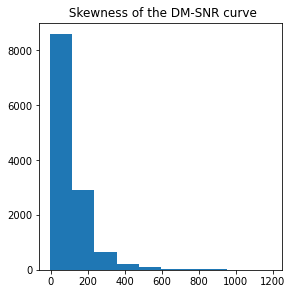

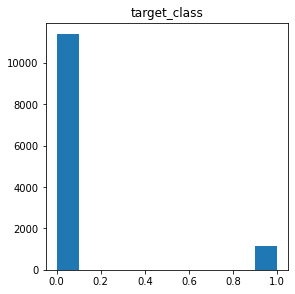

In [ ]:
for col in pulsar_df:
  plt.figure(figsize=(20,10))
  plt.subplot(2,4,2)
  plt.hist(pulsar_df[col])
  plt.title(col)

Looking at the distributions, Mean of the integrated profile, standard deivation of the integrated profile, and Excess kutosis of the DM-SNR curve are fairly normally distributed. We may want to transform some of these variables using normalization or boxcox to imporve model performance later on but we will leave them for now. 

Next, we will look at some boxplots to expose outliers. We will do this by splitting the data into actual pulsar observations and everything else. I am hoping to get an idea of what feature will have the greatest imapact on our target. Below, we split the data and run our boxplots.

In [ ]:
true_pulsar_df = pulsar_df[pulsar_df['target_class'] == 1]
false_pulsar_df = pulsar_df[pulsar_df['target_class'] == 0]
print(true_pulsar_df.count())
print(false_pulsar_df.count())

 Mean of the integrated profile                  1153
 Standard deviation of the integrated profile    1153
 Excess kurtosis of the integrated profile       1153
 Skewness of the integrated profile              1153
 Mean of the DM-SNR curve                        1153
 Standard deviation of the DM-SNR curve          1153
 Excess kurtosis of the DM-SNR curve             1153
 Skewness of the DM-SNR curve                    1153
target_class                                     1153
dtype: int64
 Mean of the integrated profile                  11375
 Standard deviation of the integrated profile    11375
 Excess kurtosis of the integrated profile       11375
 Skewness of the integrated profile              11375
 Mean of the DM-SNR curve                        11375
 Standard deviation of the DM-SNR curve          11375
 Excess kurtosis of the DM-SNR curve             11375
 Skewness of the DM-SNR curve                    11375
target_class                                     11375
dtype:

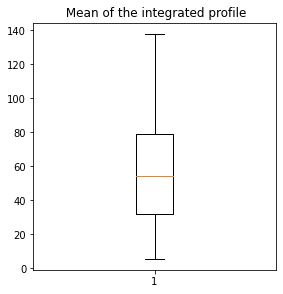

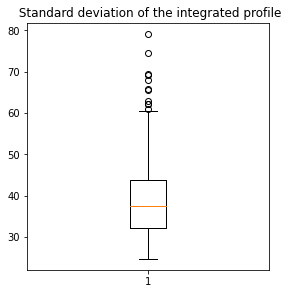

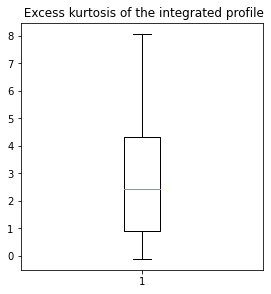

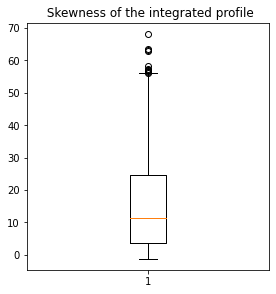

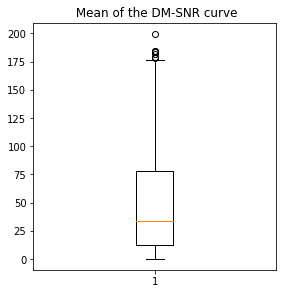

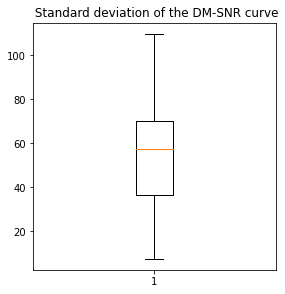

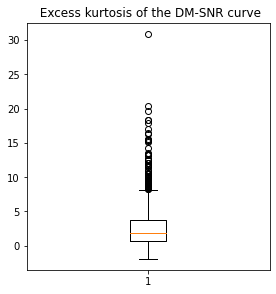

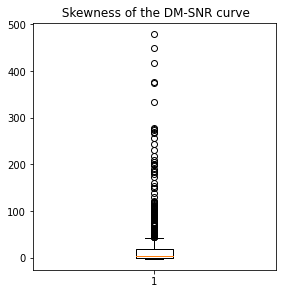

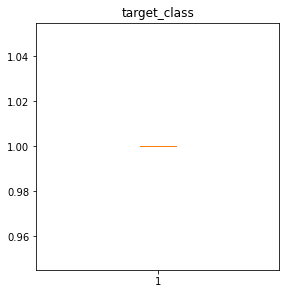

In [ ]:
for col in true_pulsar_df:
  plt.figure(figsize=(20,10))
  plt.subplot(2,4,2)
  plt.boxplot(true_pulsar_df[col])
  plt.title(col)

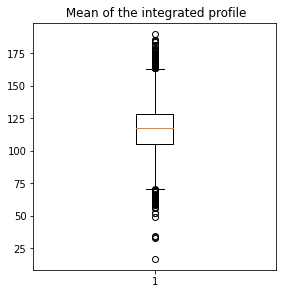

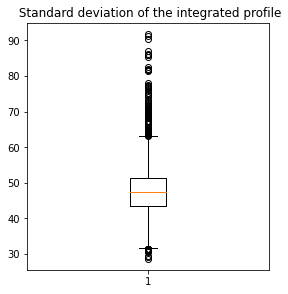

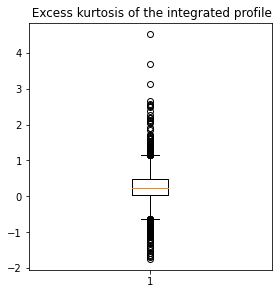

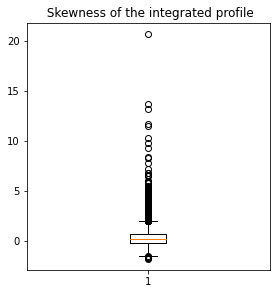

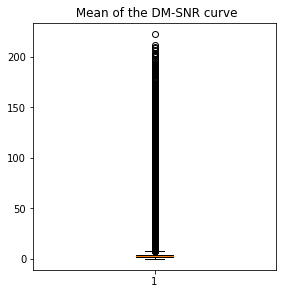

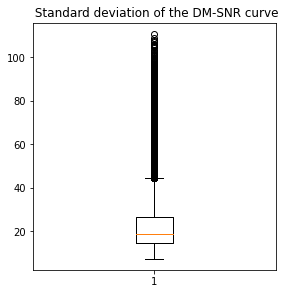

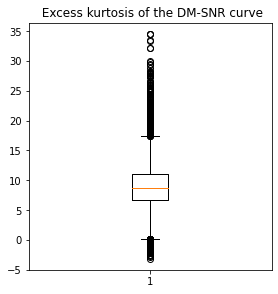

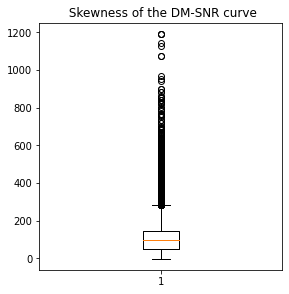

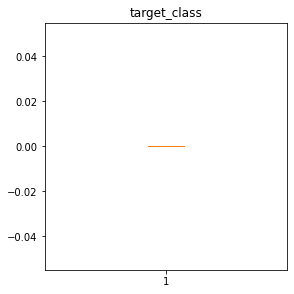

In [ ]:
for col in false_pulsar_df:
  plt.figure(figsize=(20,10))
  plt.subplot(2,4,2)
  plt.boxplot(false_pulsar_df[col])
  plt.title(col)

Some interesting observations on the above boxplots. Looking at the true pulsar data, we can see that there is 1 feature with a lot of outliers, and the rest have little to no outliers outside the 1.5 whisker length. But, when we look at those same varaiables in the false target data, they have many,many outliers.

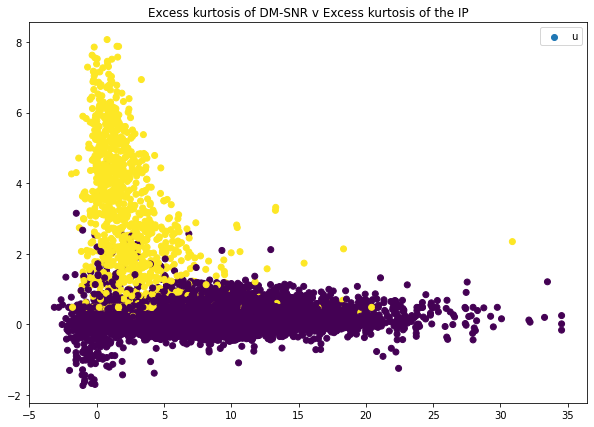

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Excess kurtosis of the integrated profile'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of DM-SNR v Excess kurtosis of the IP')
plt.legend('upper right')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Mean of DM-SNR')

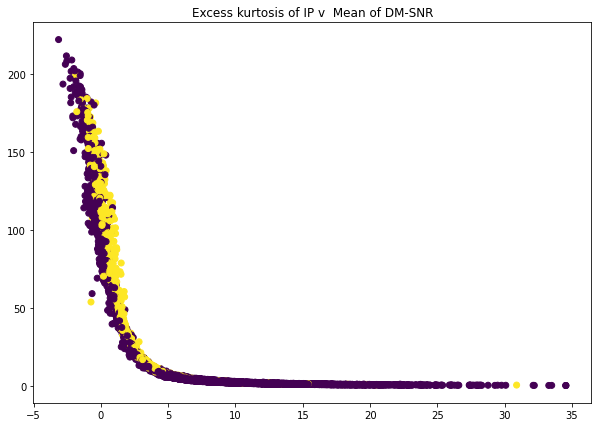

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Mean of the DM-SNR curve'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Mean of DM-SNR')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Mean of IP')

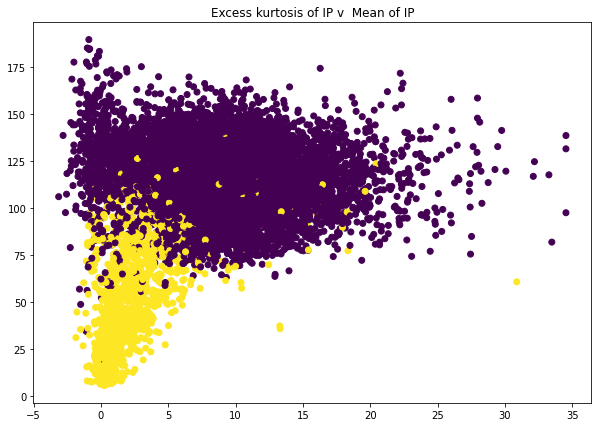

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Mean of the integrated profile'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Mean of IP')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Skewness of DM-SNR')

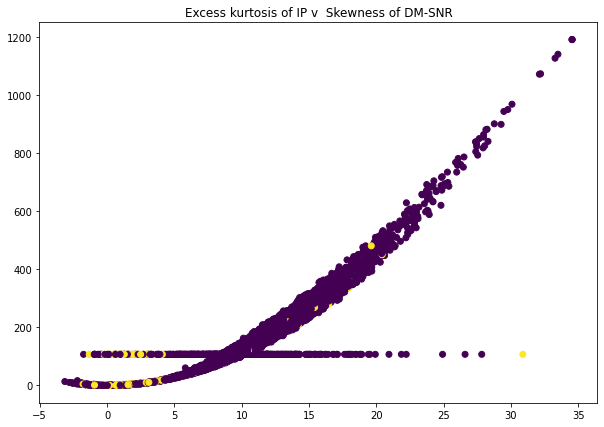

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Skewness of the DM-SNR curve'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Skewness of DM-SNR')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Skewness of the integrated profile')

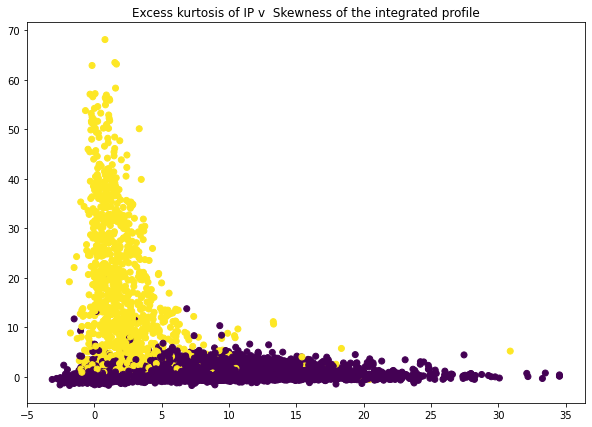

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Skewness of the integrated profile'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Skewness of the integrated profile')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Mean of DM-SNR')

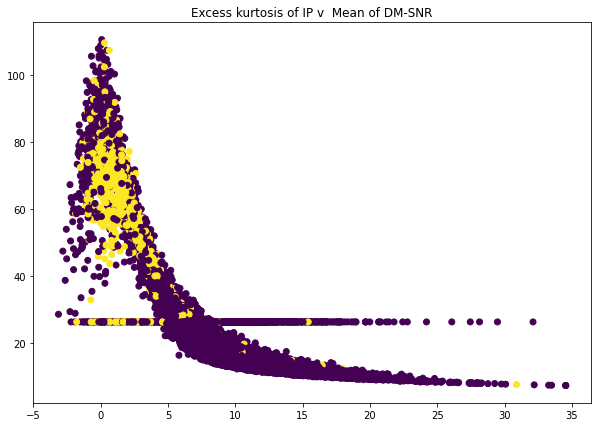

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Standard deviation of the DM-SNR curve'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Mean of DM-SNR')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Mean of DM-SNR')

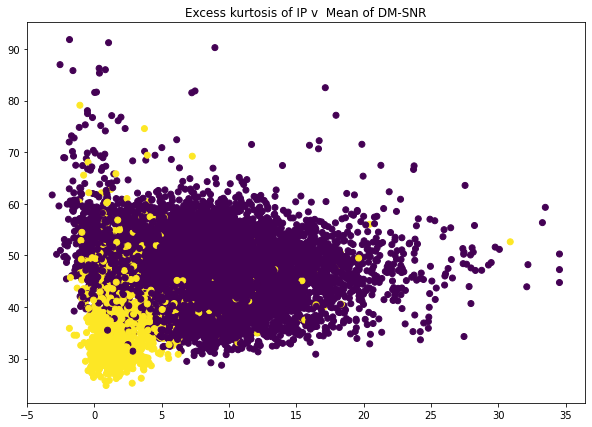

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Excess kurtosis of the DM-SNR curve'], pulsar_df[' Standard deviation of the integrated profile'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Mean of DM-SNR')

Text(0.5, 1.0, 'Excess kurtosis of IP v  Mean of DM-SNR')

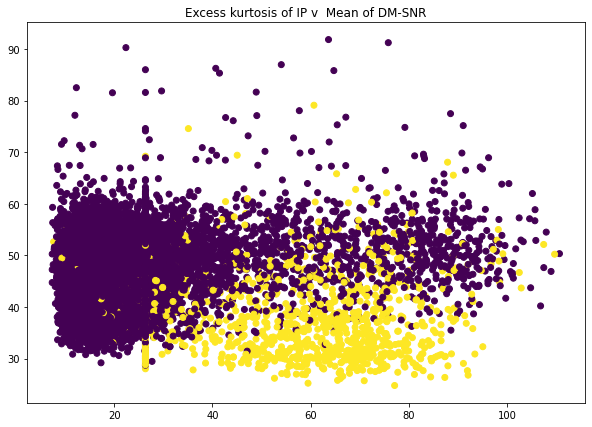

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(pulsar_df[' Standard deviation of the DM-SNR curve'], pulsar_df[' Standard deviation of the integrated profile'], c=pulsar_df['target_class'])
plt.title('Excess kurtosis of IP v  Mean of DM-SNR')

Looking at some of the plots, it appeasr some weak relationships exist between some of our varaibles and the target outcome. This shouldn't present any major issues for our model.

#Modeling: Data Splitting and Dummy Classifier Benchmarking

After exploring the data, we will keep the 8 features contained in the data set. This is because i don't want to change the data too much before running some models to see what the data in it "natural/normal" state is like when passed to a model. We evaluated this on two facets: variance of the variable and low dimnesionality of the data.

First, our data only has 8 features rather than 80. Hence, it has low dimensionality. We don't have to worry much about features with low predictive power taking away from the others and mucking up our models. Secondly, the variables all have a good deal of variance, meaning, the value within the given feature is not consistent nor constant. This variance can be seen in the above sactter plots.

We will split our data into training and test sets. Because our data is severely imbalanced between our true and false target observations, we must stratify the data when splitting to preserve the ratio.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = pulsar_df[[' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the integrated profile', ' Standard deviation of the DM-SNR curve',
               ' Mean of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Standard deviation of the integrated profile', ' Skewness of the DM-SNR curve']]
Y = pulsar_df['target_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=.3)

In [ ]:
dcf = DummyClassifier(strategy='stratified', random_state=42)

dcf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

In [ ]:
y_pred0 = dcf.predict(X_test)
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred0)))

Accuracy: 0.836924714019686


In [ ]:
print(classification_report(y_test,y_pred0,digits=3))

              precision    recall  f1-score   support

         0.0      0.909     0.912     0.910      3413
         1.0      0.099     0.095     0.097       346

    accuracy                          0.837      3759
   macro avg      0.504     0.504     0.504      3759
weighted avg      0.834     0.837     0.836      3759



In [ ]:
confusion_matrix(y_test, y_pred0)

array([[3113,  300],
       [ 313,   33]])

Now that we have obtained the above dummy classifier, we can train some other models to predict our outcome and compare them. First, we will train a KNN model.

#Modeling: KNN

In [ ]:
#we will first train a KNN model to perform our task
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import neighbors
from numpy import log
from sklearn import model_selection

In [ ]:
knn_r_acc=[]
for i in range(1,11,1):
  knn = KNeighborsClassifier(n_neighbors= i, weights='distance', algorithm='brute')
  knn.fit(X_train,y_train)
  knn_score = knn.score(X_test,y_test)
  knn_r_acc.append((i,knn_score))

df = pd.DataFrame(knn_r_acc, columns=['K', 'Score'])
print(df)

    K     Score
0   1  0.961160
1   2  0.961160
2   3  0.971003
3   4  0.971801
4   5  0.971003
5   6  0.971269
6   7  0.970737
7   8  0.971269
8   9  0.971535
9  10  0.971801


In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.9718010109071562


In [ ]:
results = model_selection.cross_val_score(knn, X_train, y_train, cv=10)
print(results.mean())

0.9732009809281331


In [ ]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.975     0.994     0.985      3413
         1.0      0.932     0.749     0.830       346

    accuracy                          0.972      3759
   macro avg      0.953     0.871     0.907      3759
weighted avg      0.971     0.972     0.970      3759



KNN appears to perform quite well for this task. We can see that for N from 1-10 we are consistently predicting at or above 97%. We can probably ignore the N=1 score since that may indicate an overfitting of the model since it is only using a single neighbor/point to predict the outcome. It is probably optimal to us a K of 2 to 4  since after that perfromance kind of levels off at 97.3%.

#Random Forest Classifier

In [ ]:
from sklearn import ensemble

In [ ]:
rfc = ensemble.RandomForestClassifier(n_estimators=500, bootstrap=True, criterion='entropy')

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred1 = rfc.predict(X_test)
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred1)))

Accuracy: 0.977121574886938


In [ ]:
print(classification_report(y_test, y_pred1, digits=3))

              precision    recall  f1-score   support

         0.0      0.980     0.995     0.987      3413
         1.0      0.942     0.801     0.866       346

    accuracy                          0.977      3759
   macro avg      0.961     0.898     0.927      3759
weighted avg      0.977     0.977     0.976      3759



In [ ]:
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=10)
print(results.mean())

0.9792452216199893


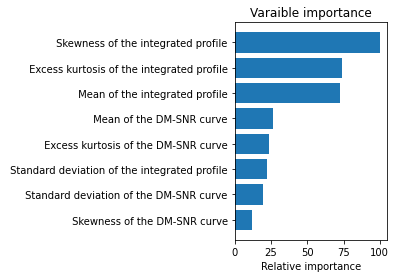

In [ ]:
feature_importance = rfc.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Varaible importance')
plt.show()

#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
svc = SVC(gamma='auto')

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   2.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   2.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.908, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.908, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.908, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.908, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.4min finished


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_preds = grid.predict(X_test)

print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3413
         1.0       0.93      0.78      0.85       346

    accuracy                           0.97      3759
   macro avg       0.96      0.89      0.92      3759
weighted avg       0.97      0.97      0.97      3759



In [ ]:
results = model_selection.cross_val_score(svc, X, Y, cv=10)
print(results.mean())

0.9084450991741226


We ran an SVC and used the grid search feature to optimize 3 of its hyper parameters adn iterate through 5 different values for each resulting in 125 total models ran and then grabbing the best one. We can see the best model had high precision, and high recall on both target classes.

#Gradient Boosted Model

In [ ]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
params = { 'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance',
          'learning_rate': .01,
          'warm_start': True}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
clf.score(X_test, y_test)

0.9763234902899708

In [ ]:
y_pred3 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred3, digits=3))

              precision    recall  f1-score   support

         0.0      0.981     0.993     0.987      3413
         1.0      0.919     0.815     0.864       346

    accuracy                          0.976      3759
   macro avg      0.950     0.904     0.925      3759
weighted avg      0.976     0.976     0.976      3759



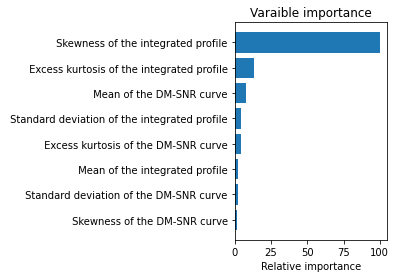

In [ ]:
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Varaible importance')
plt.show()

After tweaking the paramaters of the Gradient model for a bit, it appears most of them came out around the above values. Our model score came out to around 98% with a precision score of 94% and a recall score of 85.9%. We can also see in the above bar chart that Skewness of the integrated profile is far more important in prediction than the other variables. 

#Model Comparison and Conclusion

Looking at the models above, we will now explore which would be optimal to use for our intended task of identifying pulsar stars and some of the tradeoffs. We will look at the models' classification report and comparing their macro average f1 scores to determine the best performing one. If they are incredibly close, we will break the reports down further to determine the best model.

**F1 Scores**:

**Dummy Classifier**:  0: 91.1%, 1: 10.6% 

**KNN**: 0: 98.6%, 1: 84.9%

**Random Forest**: 0: 98.9%, 1: 88%

**Support Vector Machine**: 0: 99% 1: 89%

**Gradient Boosted Classifier**: 0: 98% 1: 87.2%

where 0 is a non-pulsar star and 1 is a pulsar star.



Looking at the dummy classifier, it did well at identifying non-pulsar stars, but very poorly at identifying pulsar stars within the dataset. The good news is all our models outperfomred the dummy classifier with the Random Forest and Gradient boosted models predicting our desired target the best at 88% and 89%, respectively.

To further evaluate the Random Forest and Gradient Boosted models, we will compare there recall scores. Recall gives us an idea of how accurate our model is at correctly labeling outcomes. The recall scores are:

**Random Forest Recall Scores**: 0: 99.5% 1: 83.8%

**Gradient Boosted Recall Scores**: 0: 99.3% 1: 82.9%

The two models do excellent at predicting a non-pulsar star(0), but the Random Forest model does edge out the Gradient boosted model in predicting pulsar stars. Thus, I'd use the Random Forest in this scenario for a few reasons. 

The Random Forest is a bit easier to understand and is a much easier model to explain and interpret. My guess would be that if we had a more balanced dataset of true and false values, the RF models recall would imrpove. One of the issues i had when tuning this model is the precision-recall curve trade off.

Below we will dive deeper into the Random Forest models precision-recall relationship.

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve

In [ ]:
aps = average_precision_score(y_test, y_pred1)

Text(0.5, 1.0, 'PRC:AP= 0.76')

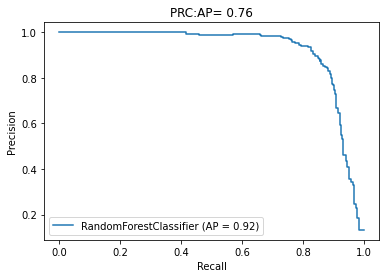

In [ ]:
prc = plot_precision_recall_curve(rfc, X_test, y_test)
prc.ax_.set_title('PRC:' 'AP= {0:0.2f}'.format(aps))

Text(0.5, 1.0, 'PRC:AP= 0.76')

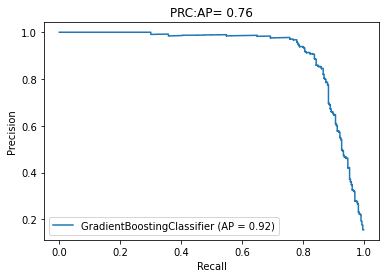

In [ ]:
prc = plot_precision_recall_curve(clf, X_test, y_test)
prc.ax_.set_title('PRC:' 'AP= {0:0.2f}'.format(aps))

As we can see, the optimal point for our model falls at the corner of the curve where precision is close to +90% and recall is between 80-85%. After that, in order to gain more recall, the curve drops and the tradeoff becomes to expensive in terms of forgone precision. 


After having trained multiple models, identifying the Random Forest as being the optimal performer, and identifying why that was the case, we can now implement the model with confidence and while keeping it limitations in mind.

In [ ]:
git remote add origin https://github.com/Gr3gP/Pulsar-Stars.git
git branch -M main
git push -u origin main

SyntaxError: ignored